In [2]:
#install.packages("tidyverse")
library(tidyverse)
library(modelr)
# Data Handling

if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
BiocManager::install()
library(BiocManager)
# General bioinformatics packages

library(BSgenome)
library(BSgenome.Hsapiens.UCSC.hg19)
# Human genome build GChr37

library(biomaRt)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required namespace: BiocManager
Bioconductor version 3.8 (BiocManager 1.30.3), R 3.5.1 (2018-07-02)
Update old packages: 'annotate', 'backports', 'BiocInstaller', 'BiocManager',
  'BiocParallel', 'Biostrings', 'biovizBase', 'broom', 'callr', 'caTools',
  'checkmate', 'circlize', 'class', 'cli', 'clipr', 'clusterProfiler',
  'codetools', 'colorspace', 'cowplot', 'curl', 'data.table', 'dbplyr',
  'DESeq', 'DOSE', 'dplyr', 'e1071', 'EDASeq', 'edgeR', 'ELMER', 'ensembldb',
  'evaluate', 'forcats', 'foreign', 'formatR', 'fs', 'gdsfmt', 'Geno

In [3]:
source("TMB_Funcs.txt")
# My Stuff!

path_name <- "/Volumes/CCG8/processed_data"
genome <- BSgenome.Hsapiens.UCSC.hg19
ensembl = useMart("ensembl", dataset = "hsapiens_gene_ensembl")
ensembl37 = useMart(host = "grch37.ensembl.org", biomart = "ENSEMBL_MART_ENSEMBL", dataset = "hsapiens_gene_ensembl")
select <- dplyr::select

### Loading Data

In [4]:
tmb_patient <- read_tsv(paste0(path_name, "/tmb_mskcc_2018/data_clinical_patient.txt"), comment = "#")

Parsed with column specification:
cols(
  PATIENT_ID = col_character(),
  TMB_SCORE = col_double(),
  SEX = col_character(),
  OS_MONTHS = col_integer(),
  OS_STATUS = col_character(),
  AGE_GROUP = col_character(),
  DRUG_TYPE = col_character()
)


In [5]:
tmb_clinical <- read_tsv(paste0(path_name, "/tmb_mskcc_2018/data_clinical_sample.txt"), comment = "#")

Parsed with column specification:
cols(
  PATIENT_ID = col_character(),
  SAMPLE_ID = col_character(),
  CANCER_TYPE = col_character(),
  SAMPLE_TYPE = col_character(),
  SAMPLE_CLASS = col_character(),
  METASTATIC_SITE = col_character(),
  PRIMARY_SITE = col_character(),
  CANCER_TYPE_DETAILED = col_character(),
  GENE_PANEL = col_character(),
  SAMPLE_COVERAGE = col_integer(),
  TUMOR_PURITY = col_character(),
  ONCOTREE_CODE = col_character(),
  INSTITUTE = col_character(),
  SOMATIC_STATUS = col_character(),
  AGE_AT_SEQ_REPORT = col_integer()
)


In [6]:
three_cancer_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/three_cancer_data")
lung_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/lung_data")

In [8]:
tmb_data <- cbio_getData(path_name, "mixed", by_cancer = TRUE, test = FALSE) %>% 
    filter(study == "tmb_mskcc_2018") %>% 
    select(-study)

Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "all_stjude_2013"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 44


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "cellline_ccle_broad"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Chromosome = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  `MA:FIS` = col_double(),
  ONCOTATOR_PROTEIN_POS_END = col_integer(),
  ONCOTATOR_PROTEIN_POS_END_BEST_EFFECT = col_integer(),
  ONCOTATOR_EXON_AFFECTED = col_integer(),
  MA = col_integer(),
  ONCOTATOR_PROTEIN_POS_START = col_integer(),
  ONCOTATOR_EXON_AFFECTED_BEST_EFFECT = col_integer(),
  ONCOTATOR_PROTEIN_POS_START_BEST_EFFECT = col_integer()
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“2898 parsing failures.
row # A tibble: 5 x 5 col     row col      expected  actual file                                           expe

[1] "cellline_nci60"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer(),
  ALLELE_NUM = col_integer(),
  PICK = col_integer(),
  n_depth = col_integer(),
  HGNC_ID = col_integer(),
  ExAC_AF_AMR = col_double(),
  t_depth = col_integer(),
  `MA:FIS` = col_double(),
  DISTANCE = col_integer(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  HGVS_OFFSET = col_integer()
  # ... with 4 more columns
)
See spec(...) for full column specifications.


[1] 60


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "hnc_mskcc_2016"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Strand = col_integer(),
  `MA:FIS` = col_double(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_depth = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double()
  # ... with 7 more columns
)
See spec(...) for full column specifications.


[1] 127


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "mixed_allen_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  NCBI_Build = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Transcript_Exon = col_integer(),
  t_alt_count = col_integer(),
  t_ref_count = col_integer(),
  Pr_somatic_clonal = col_double(),
  Pr_germline = col_integer(),
  Pr_subclonal = col_double(),
  homozygous.ix = col_logical(),
  ccf_hat = col_double(),
  clonal_dm = col_integer(),
  hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 249


Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "mixed_pipseq_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  STRAND_VEP = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer()
  # ... with 1 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“72 parsing failures.
row # A tibble: 5 x 5 col     row col   expected   actual    file                                        

[1] 99


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "msk_impact_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  Protein_position = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 10078


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specif

[1] "pediatric_dkfz_2017"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  ALLELE_NUM = col_integer(),
  DISTANCE = col_integer(),
  STRAND_VEP = col_integer(),
  HGNC_ID = col_integer(),
  PUBMED = col_number(),
  PICK = col_integer(),
  HGVS_OFFSET = col_integer(),
  MINIMISED = col_integer(),
  ExAC_AF = col_double(),
  ExAC_AF_AFR = col_double(),
  ExAC_AF_AMR = col_double(),
  ExAC_AF_EAS = col_double(),
  ExAC_AF_FIN = col_double(),
  ExAC_AF_NFE = col_double(),
  ExAC_AF_OTH = col_double(),
  ExAC_AF_SAS = col_double(),
  GENE_PHENO = col_integer()
  # ... with 1 more columns
)
See spec(...) for full column specifications.
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 2)”Warning message:
“1 parsing failure.
row # A tibble: 1 x 5 col     row col   expected   actual   file                                           

[1] "summit_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  Tumor_Sample_Barcode = col_integer(),
  t_depth = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  ExAC_AF_Adj = col_double()
)
See spec(...) for full column specifications.


[1] 106


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] "tmb_mskcc_2018"


Parsed with column specification:
cols(
  .default = col_character(),
  Entrez_Gene_Id = col_integer(),
  Start_Position = col_integer(),
  End_Position = col_integer(),
  t_ref_count = col_integer(),
  t_alt_count = col_integer(),
  n_ref_count = col_integer(),
  n_alt_count = col_integer(),
  Hotspot = col_integer()
)
See spec(...) for full column specifications.


[1] 1608


Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)
Parsed with column specification:
cols(
  X1 = col_character()
)


[1] 11172


In [9]:
panel <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/2.5Mpanel.txt")
panel <- panel$panel
impact_panel <- tmb_data %>% 
    pull(Hugo_Symbol) %>% 
    unique()

Parsed with column specification:
cols(
  panel = col_character()
)


In [10]:
patient_sample <- full_join(tmb_patient, tmb_clinical, by = "PATIENT_ID") %>% 
    select(PATIENT_ID, SAMPLE_ID)

### Cancer Type, Treatment and TMB Demographics

In [62]:
tmb_clinical %>% 
    group_by(ONCOTREE_CODE) %>% 
    count() %>% 
    arrange(desc(n))

ONCOTREE_CODE,n
LUAD,271
SKCM,187
BLCA,147
CCRCC,121
COAD,85
GBM,82
UTUC,47
LUSC,45
MUP,44
ESCA,39


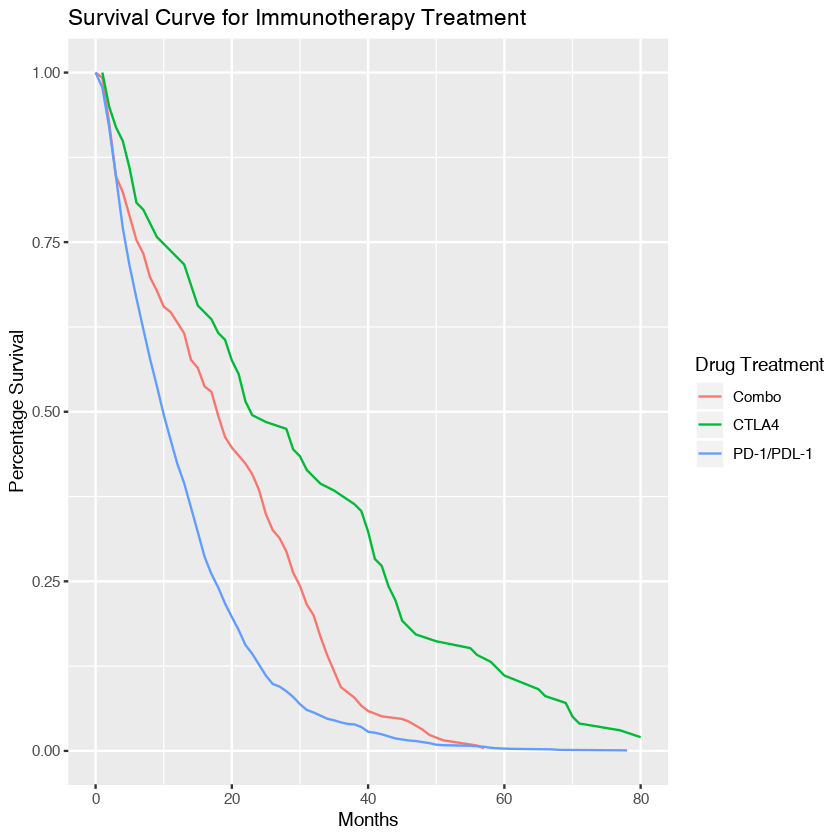

In [69]:
tmb_patient %>% 
    group_by(DRUG_TYPE) %>%
    nest() %>%
    mutate(data = map(data, ~group_by(.x, OS_MONTHS) %>% nest())) %>%
    mutate(data = map(data, ~arrange(.x, OS_MONTHS))) %>% 
    mutate(data = map(data, ~mutate(.x, count_deaths = unlist(map(data, nrow))))) %>% 
    mutate(data = map(data, ~mutate(.x, index = 1:nrow(.x)))) %>% 
    mutate(data = map(data, ~mutate(.x, still_alive = unlist(map(index, ~sum(count_deaths[.x:length(count_deaths)])))))) %>% 
    mutate(data = map(data, ~select(.x, OS_MONTHS, still_alive))) %>% 
    mutate(data = map(data, ~mutate(.x, still_alive_prop = still_alive/max(still_alive)))) %>% 
    unnest() %>% 
    ggplot(aes(x = OS_MONTHS, y = still_alive_prop, colour = DRUG_TYPE)) + geom_line() + labs(x = "Months", y = "Percentage Survival") +
    labs(title = "Survival Curve for Immunotherapy Treatment", colour = "Drug Treatment") 


In [70]:
tmb_patient %>% 
    group_by(DRUG_TYPE) %>% 
    count()

DRUG_TYPE,n
Combo,255
CTLA4,99
PD-1/PDL-1,1307


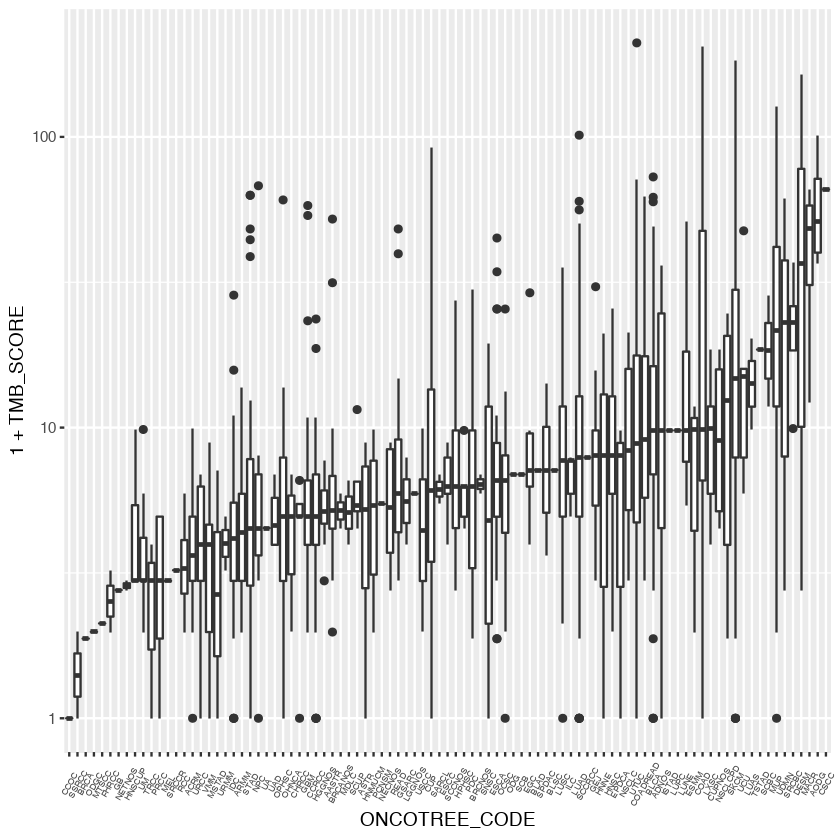

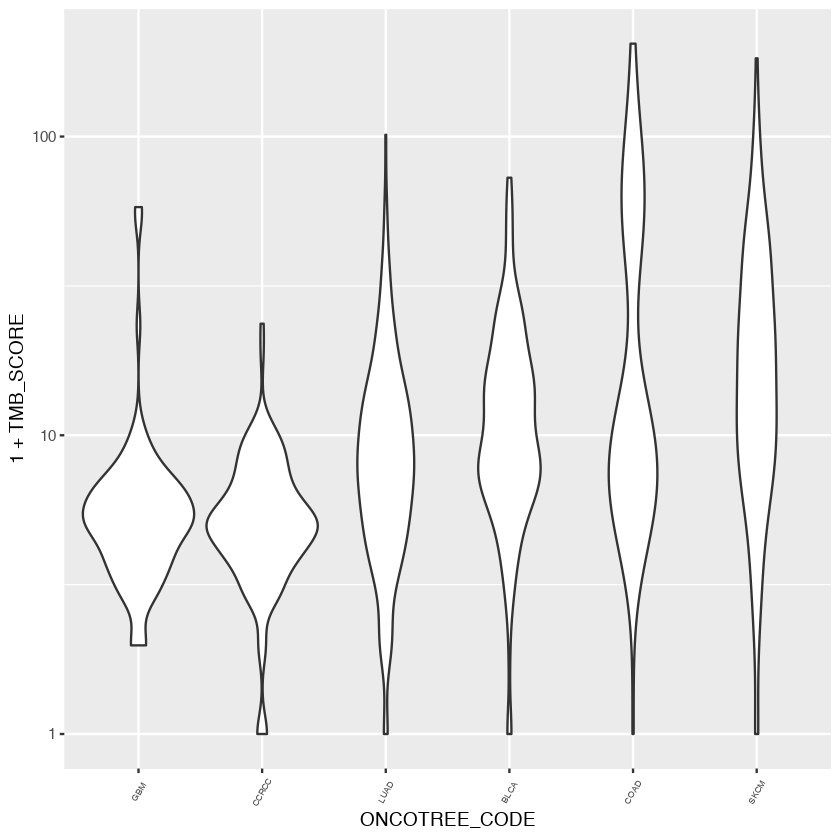

In [89]:
demog_data <- tmb_clinical %>% 
    select(SAMPLE_ID, PATIENT_ID, ONCOTREE_CODE) %>%    
    full_join(tmb_patient, by = "PATIENT_ID") %>% 
    select(PATIENT_ID, SAMPLE_ID, ONCOTREE_CODE, TMB_SCORE) %>%
    group_by(ONCOTREE_CODE) %>% 
    nest() %>% 
    mutate(cancer_type_median = unlist(map(data, ~median(.x$TMB_SCORE))),
           n_cancer = unlist(map(data, nrow))) %>% 
    unnest() %>%
    arrange(cancer_type_median) %>% 
    mutate(ONCOTREE_CODE = factor(ONCOTREE_CODE, levels = unique(ONCOTREE_CODE)))

demog_data %>% 
    ggplot(aes(y = 1 + TMB_SCORE, x = ONCOTREE_CODE)) + geom_boxplot() + scale_y_log10() + 
    theme(axis.text.x = element_text(angle = 60, size = 5, vjust = 0.5))
demog_data %>% 
    filter(n_cancer > 50) %>% 
    ggplot(aes(y = 1 + TMB_SCORE, x = ONCOTREE_CODE)) + geom_violin() + scale_y_log10() + 
    theme(axis.text.x = element_text(angle = 60, size = 5, vjust = 0.5))

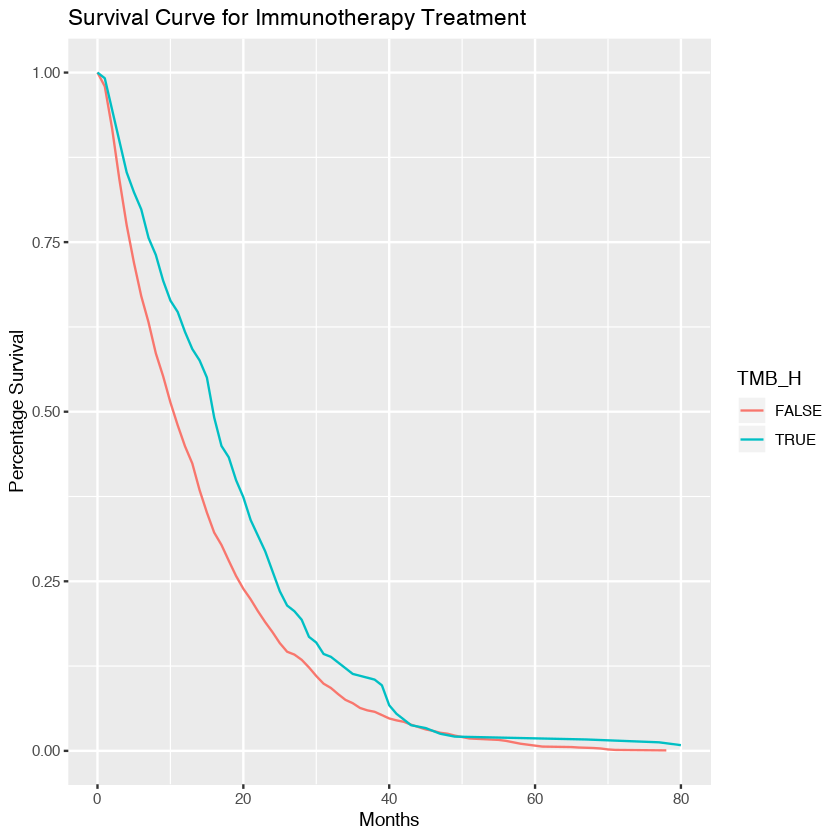

In [140]:
tmb_patient %>% 
    mutate(TMB_H = TMB_SCORE > 20) %>% 
    group_by(TMB_H) %>%
    nest() %>%
    mutate(data = map(data, ~group_by(.x, OS_MONTHS) %>% nest())) %>%
    mutate(data = map(data, ~arrange(.x, OS_MONTHS))) %>% 
    mutate(data = map(data, ~mutate(.x, count_deaths = unlist(map(data, nrow))))) %>% 
    mutate(data = map(data, ~mutate(.x, index = 1:nrow(.x)))) %>% 
    mutate(data = map(data, ~mutate(.x, still_alive = unlist(map(index, ~sum(count_deaths[.x:length(count_deaths)])))))) %>% 
    mutate(data = map(data, ~select(.x, OS_MONTHS, still_alive))) %>% 
    mutate(data = map(data, ~mutate(.x, still_alive_prop = still_alive/max(still_alive)))) %>% 
    unnest() %>% 
    ggplot(aes(x = OS_MONTHS, y = still_alive_prop, colour = TMB_H)) + geom_line() + labs(x = "Months", y = "Percentage Survival") +
    labs(title = "Survival Curve for Immunotherapy Treatment", colour = "TMB_H") 


### Resistance Genes: First Question

Produce a training matrix with columns treatment, cancer_type, TMB, IMPACT Genes

In [103]:
gene_matrix <- tmb_data %>% 
    select(Tumor_Sample_Barcode, Hugo_Symbol)  %>% 
    group_by(Tumor_Sample_Barcode, Hugo_Symbol) %>% 
    summarise(n = n()) %>% 
    ungroup() %>% 
    spread(Hugo_Symbol, n)

gene_matrix[is.na(gene_matrix)] <- 0

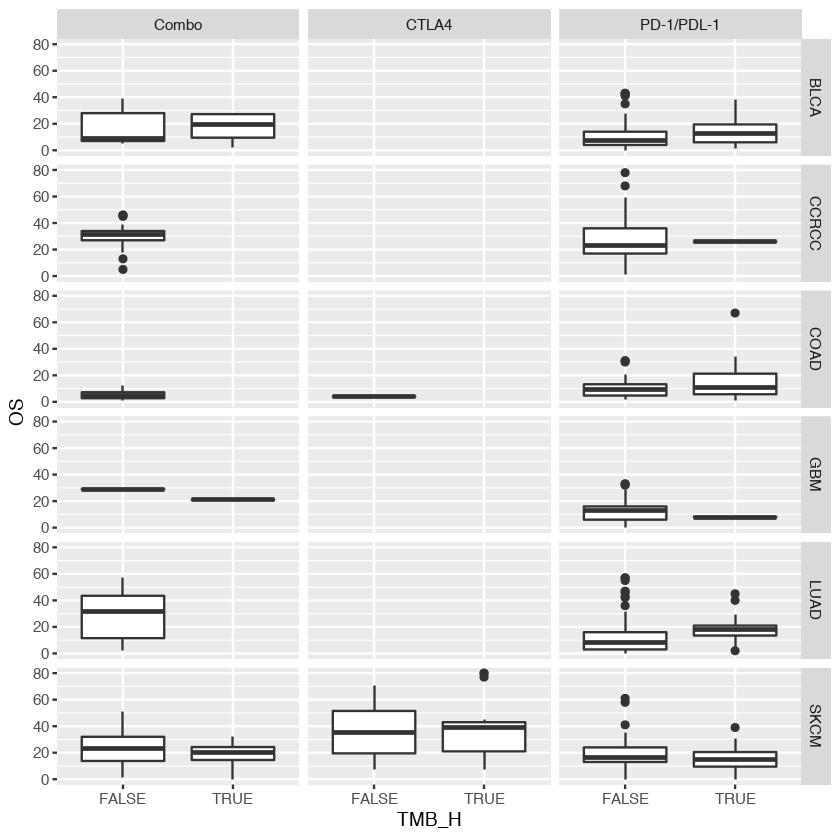

In [137]:
tmb_patient %>% 
    full_join(patient_sample, by = "PATIENT_ID") %>% 
    mutate(Tumor_Sample_Barcode = SAMPLE_ID, TMB = TMB_SCORE, OS = OS_MONTHS, TMB_H = TMB_SCORE > 20) %>% 
    full_join(tmb_clinical, by = "SAMPLE_ID") %>%
    select(Tumor_Sample_Barcode, OS, TMB, TMB_H, ONCOTREE_CODE, SEX, AGE_GROUP, DRUG_TYPE) %>% 
    group_by(ONCOTREE_CODE) %>% 
    nest() %>% 
    mutate(n_cancer = unlist(map(data, nrow))) %>% 
    unnest() %>% 
    filter(n_cancer > 50) %>% 
    ggplot(aes(x = TMB_H, y = OS)) + geom_boxplot() + facet_grid(ONCOTREE_CODE ~ DRUG_TYPE) 
    

In [142]:
lung_data[["training_data"]] %>% 
    pull(Hugo_Symbol) %>% 
    unique() %>% 
    length()

[1] 17268

In [146]:
tmb_data %>%
    pull(Hugo_Symbol) %>% 
    unique() %>% 
    length()

[1] 474

In [148]:
impact_panel %>% 
    get_gene_lengths()

ERROR: Error in UseMethod("groups"): no applicable method for 'groups' applied to an object of class "character"


In [262]:
get_gene_lengths <- function(gene_list, ensembl = ensembl37) {
    
    full_lengths <- getBM(c("hgnc_symbol", "chromosome_name", "start_position", "end_position"), filters = "hgnc_symbol", values = gene_list$hgnc_symbol, mart = ensembl) %>% 
        mutate(length = end_position - start_position) %>% 
        filter(chromosome_name %in% c(1:22, "X", "Y")) %>% 
        select(hgnc_symbol, length)
    
    coding_lengths <- getBM(c("cds_length", "ensembl_gene_id"), filters = "hgnc_symbol", values = gene_list$hgnc_symbol, mart = ensembl) %>% 
        {full_join(., getBM(c("hgnc_symbol", "ensembl_gene_id"), filters = "ensembl_gene_id", values = .$ensembl_gene_id, mart = ensembl), by = "ensembl_gene_id")} %>% 
        group_by(hgnc_symbol) %>% 
        mutate(max_cds = max(cds_length, na.rm = TRUE)) %>% 
        select(hgnc_symbol, max_cds) %>% 
        distinct() %>% 
        mutate(max_cds = if_else(is.finite(max_cds), max_cds, as.double(NA_integer_)))
    
    return(full_join(full_lengths, coding_lengths, by = "hgnc_symbol"))
        
}


In [263]:
get_gene_lengths(tibble(hgnc_symbol = panel))$max_cds %>% mean(na.rm = TRUE)
get_gene_lengths(tibble(hgnc_symbol = impact_panel))$max_cds %>% mean(na.rm = TRUE)
get_gene_lengths(tibble(hgnc_symbol = lung_data[["training_data"]] %>% 
                                           pull(Hugo_Symbol) %>% 
                                           unique()))$max_cds %>% mean(na.rm = TRUE)

[1] 1252.251

[1] 2489.696

[1] 1835.582

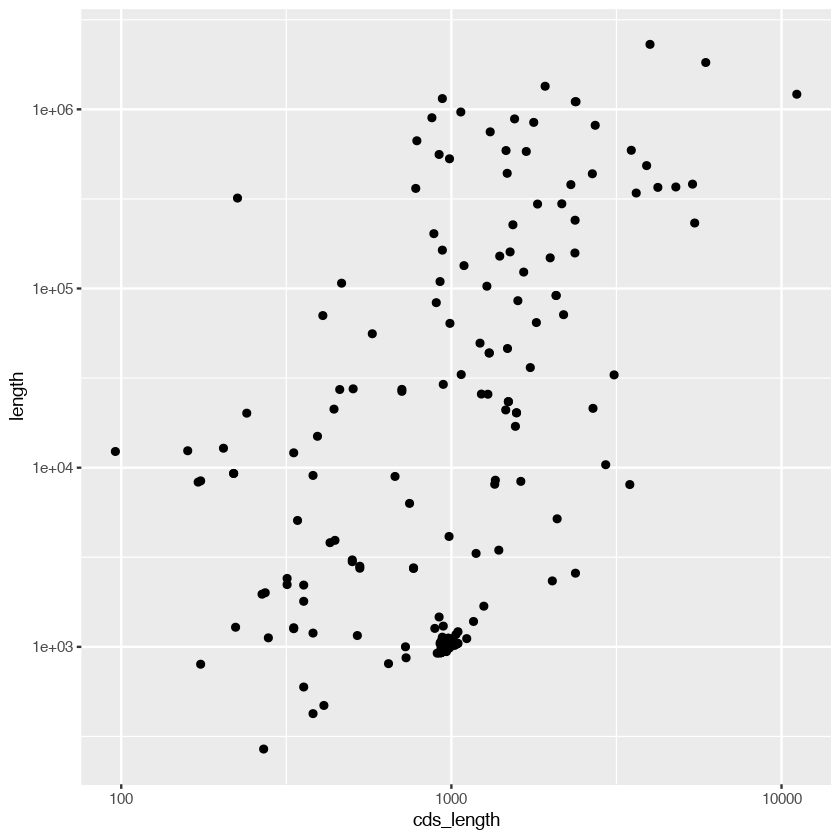

In [190]:
getBM(c("hgnc_symbol", "chromosome_name", "start_position", "end_position"), filters = "hgnc_symbol", values = panel, mart = ensembl37) %>% 
    mutate(length = end_position - start_position)  %>% 
    filter(hgnc_symbol %in% panel) %>% 
    select(hgnc_symbol, length) %>% 
    full_join(all_lung_stats %>% 
                 filter(Hugo_Symbol %in% panel) %>% 
                 mutate(hgnc_symbol = Hugo_Symbol, cds_length = length) %>% 
                 select(hgnc_symbol, cds_length), by = "hgnc_symbol") %>% 
    ggplot(aes(x = cds_length, y = length)) + geom_point() + scale_y_log10() + scale_x_log10()
    

In [195]:
getBM(c("hgnc_symbol", "chromosome_name", "start_position", "end_position"), filters = "hgnc_symbol", values = panel, mart = ensembl37) %>% 
    mutate(length = end_position - start_position) %>% 
    filter(chromosome_name %in% c(1:22, "X", "Y")) %>% 
    select(hgnc_symbol, length)

hgnc_symbol,length
ACSM2A,36208
ADAMTS12,368657
ASB5,63898
BCHE,64568
BRINP3,379967
CA10,529703
CALN1,667660
CARD18,2005
CCER1,49554
CD1A,4132


In [173]:
all_lung_stats <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/all_lung_stats")

Parsed with column specification:
cols(
  Hugo_Symbol = col_character(),
  coefficient = col_double(),
  p_val = col_double(),
  cor = col_double(),
  n = col_integer(),
  length = col_integer()
)
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 1)”Warning message:
“4 parsing failures.
row # A tibble: 4 x 5 col     row col    expected           actual file                                    expected   <int> <chr>  <chr>              <chr>  <chr>                                   actual 1  1153 length no trailing chara… e3     '/Users/jacobbradley/Documents/CCG/Dat… file 2  2158 length no trailing chara… e3     '/Users/jacobbradley/Documents/CCG/Dat… row 3  5187 length no trailing chara… e3     '/Users/jacobbradley/Documents/CCG/Dat… col 4  8260 length no trailing chara… e3     '/Users/jacobbradley/Documents/CCG/Dat…
”

In [184]:
all_lung_stats %>%    
    filter(Hugo_Symbol %in% panel) %>% 
    arrange(Hugo_Symbol)

Hugo_Symbol,coefficient,p_val,cor,n,length
ACSM2A,10.413644,8.138172e-21,0.30669442,48,1734
ADAMTS12,7.448548,2.895606e-39,0.41692359,155,4785
ASB5,16.165850,9.357916e-19,0.29083531,22,990
BCHE,10.048214,1.548579e-18,0.28908752,54,1809
BRINP3,7.179467,1.525585e-24,0.33321401,120,2301
CA10,13.317014,8.965226e-16,0.26575389,23,987
CALN1,10.236774,1.129002e-09,0.20390022,25,786
CARD18,14.490292,1.251749e-05,0.14821437,7,273
CCER1,13.679556,4.710514e-20,0.30085848,29,1221
CD1A,9.859752,1.070302e-11,0.22654921,30,984


In [217]:
listAttributes(ensembl37) %>% 
    filter(name == "ensembl_gene_id" | name == "cds_length")   
    
    

name,description,page
ensembl_gene_id,Gene stable ID,feature_page
ensembl_gene_id,Gene stable ID,structure
cds_length,CDS Length,structure
ensembl_gene_id,Gene stable ID,homologs
ensembl_gene_id,Gene stable ID,snp
ensembl_gene_id,Gene stable ID,snp_somatic
ensembl_gene_id,Gene stable ID,sequences
cds_length,CDS Length,sequences


In [261]:
getBM(c("cds_length", "ensembl_gene_id"), filters = "hgnc_symbol", values = impact_panel, mart = ensembl37) %>% 
    {full_join(., getBM(c("hgnc_symbol", "ensembl_gene_id"), filters = "ensembl_gene_id", values = .$ensembl_gene_id, mart = ensembl37), by = "ensembl_gene_id")} %>% 
    group_by(hgnc_symbol) %>% 
    mutate(max_cds = max(cds_length, na.rm = TRUE)) %>% 
    select(hgnc_symbol, max_cds) %>% 
    distinct() %>%    
    mutate(max_cds = if_else(is.finite(max_cds), max_cds, as.double(NA_integer_))) %>% 
    filter(!is.finite(max_cds))


hgnc_symbol,max_cds
KMT2B,NA


In [256]:
typeof(as.double(NA_integer_))

[1] "double"

In [258]:
if_else(1 > 0, 3, as.double(NA_integer_))

[1] 3